# "2019 December One Day Holding Long Short Portfolio BackTest"
> "2019 December Portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [13]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [14]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [15]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20191201].loc[df_testp.Date<20191232].sort_values(by='Date',ascending=True).copy()

**Long-Short Portfolio**

In [16]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20191203,1.0,-3.553897,1.000000
1,20191205,1.0,22.814880,0.964461
2,20191206,1.0,5.311584,1.184502
3,20191209,-1.0,22.950820,1.247417
4,20191209,1.0,1.365188,1.533710
5,20191210,1.0,-0.846267,1.554648
6,20191212,1.0,-11.715548,1.541492
7,20191213,-1.0,-0.665557,1.360897
8,20191213,1.0,-0.018657,1.351840
9,20191216,1.0,16.763160,1.351588


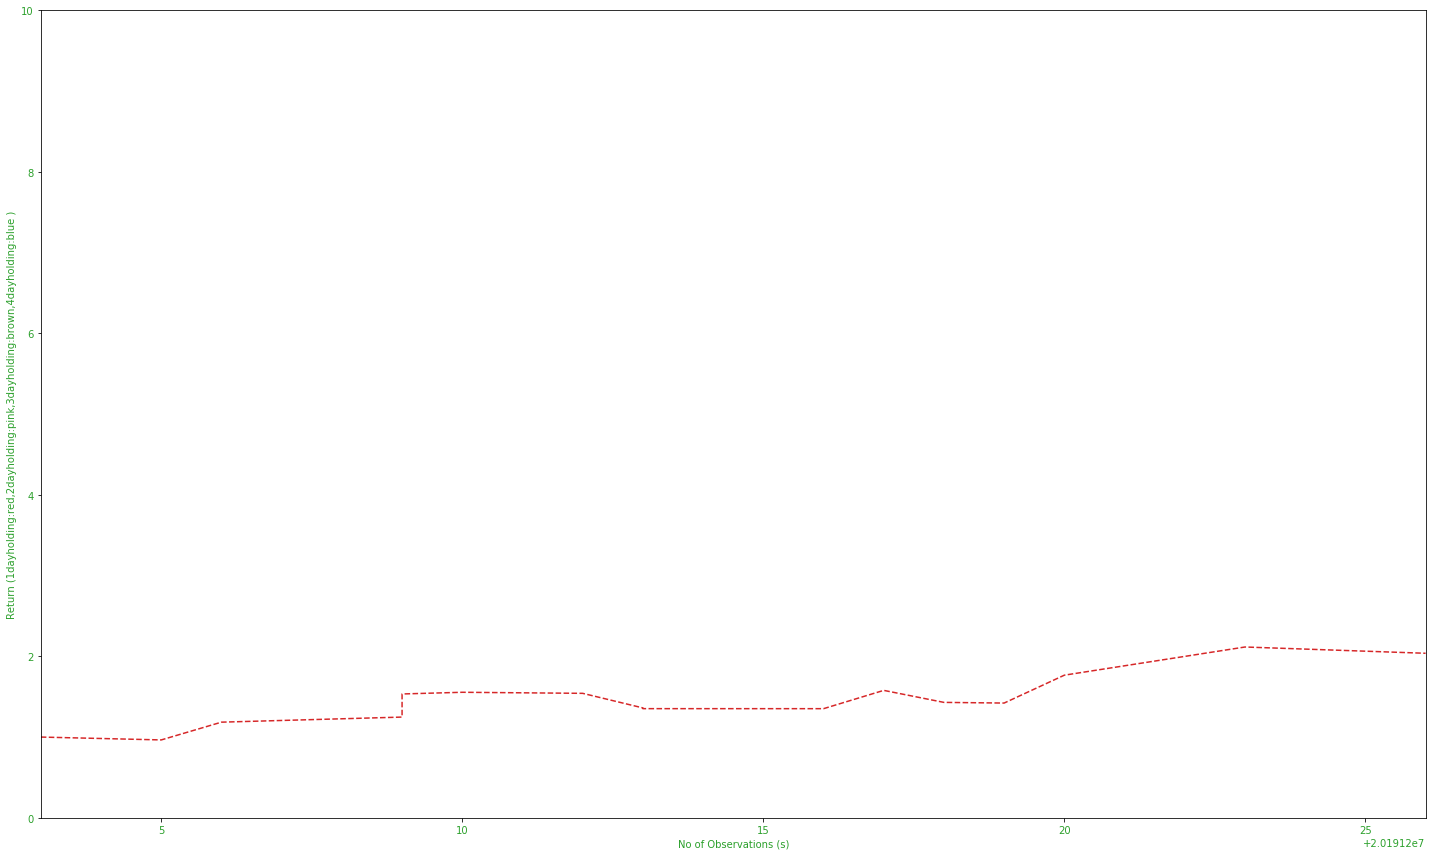

In [18]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Long portfolio**

In [19]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20191203,1.0,-3.553897,1.000000
1,20191205,1.0,22.814880,0.964461
2,20191206,1.0,5.311584,1.184502
3,20191209,1.0,1.365188,1.247417
4,20191210,1.0,-0.846267,1.264447
5,20191212,1.0,-11.715548,1.253746
6,20191213,1.0,-0.018657,1.106863
7,20191216,1.0,16.763160,1.106657
8,20191217,1.0,-9.425638,1.292167
9,20191218,1.0,-0.574332,1.170372


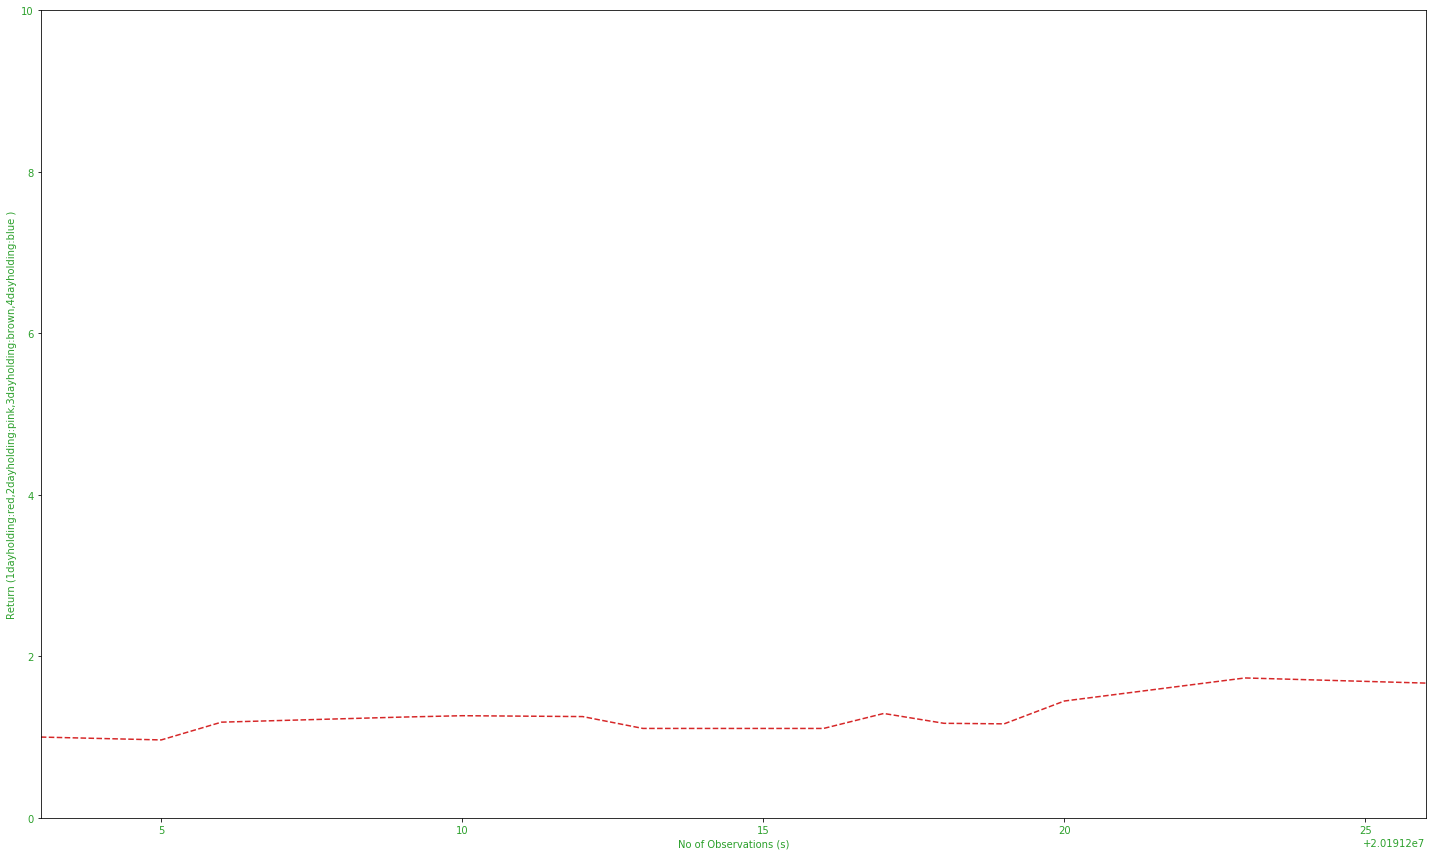

In [21]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Short Portfolio**

In [22]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==-1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20191209,-1.0,22.950820,1.000000
1,20191213,-1.0,-0.665557,1.229508


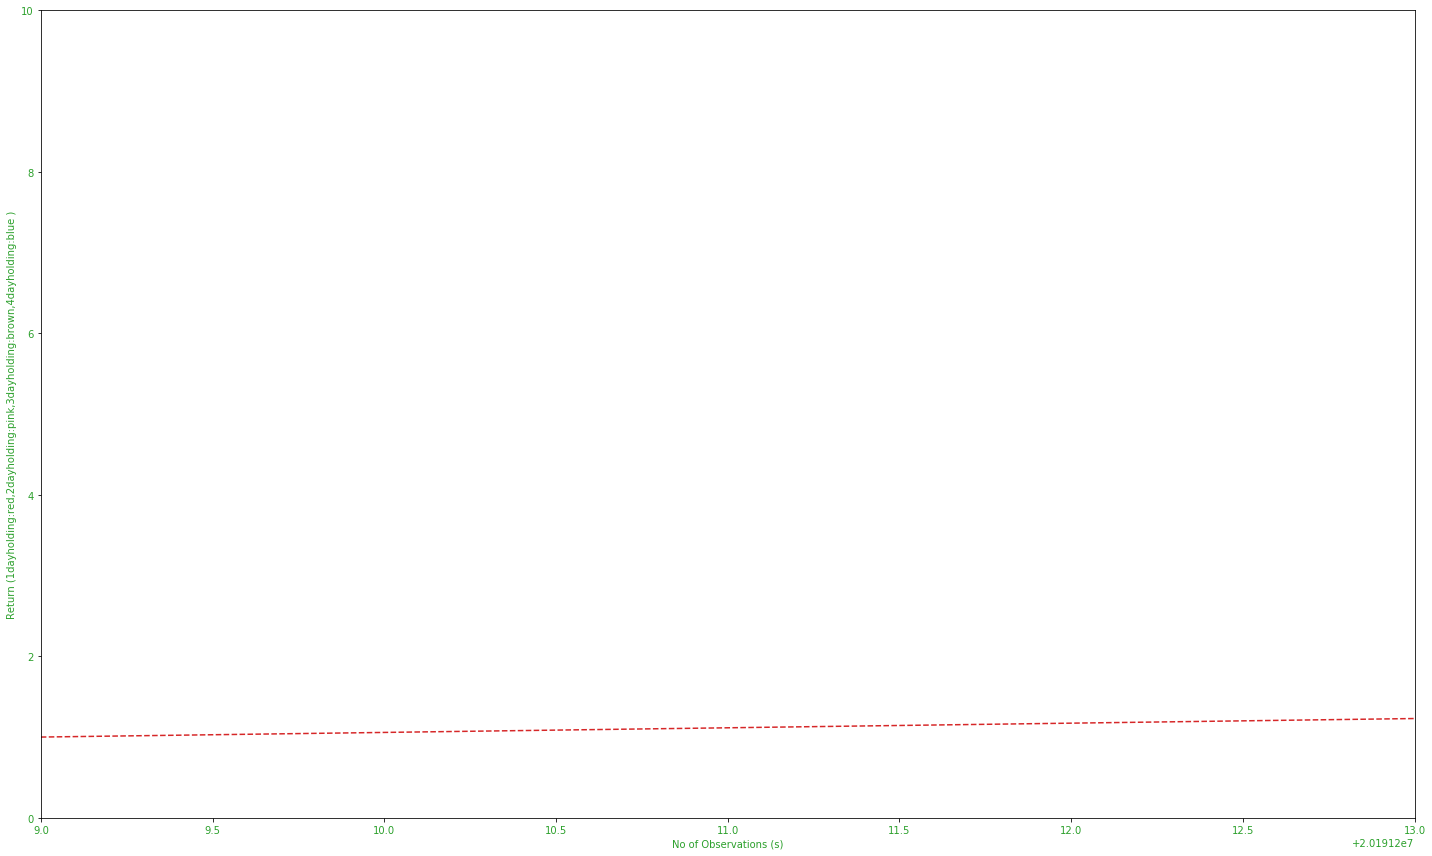

In [24]:
#hide
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()